In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.io import loadmat
indian_pines = loadmat('dataset/Indian_pines_corrected.mat')

In [ ]:
# 由关键字可知，读取'indian_pines_corrected'字段
indian_pines = indian_pines['indian_pines_corrected']

In [ ]:
# 读取标签数据
indian_pines_gt = loadmat('dataset/Indian_pines_gt.mat')
indian_pines_gt = indian_pines_gt['indian_pines_gt']


## 读取数据

In [ ]:
X = indian_pines
y = indian_pines_gt
print(f"X shape: {X.shape}\ny shape: {y.shape}")

In [ ]:
# 真实数据
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

In [ ]:
plt.figure()
for i in range(y.shape[0]):
    plt.plot(y[i])

In [ ]:
import seaborn as sns # 绘制部分光谱带
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))
for i in range(1, 1+6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

In [ ]:
plt.imshow(X[:, :, 100], cmap='jet')
plt.axis('off')
plt.title(f'band - {100}')

In [ ]:
class_labels = {'1':'Alfalfa',
                '2':'Corn-notill',
                '3':'Corn-mintill',
                '4':'Corn',
                '5':'Grass-pasture',
                '6':'Grass-trees',
                '7':'Grass-pasture-mowed',
                '8':'Hay-windrowed',
                '9':'Oats',
                '10':'Soybean-notill',
                '11':'Soybean-mintill',
                '12':'Soybean-clean',
                '13':'Wheat',
                '14':'Woods',
                '15':'Buildings-Grass-Trees-Drives',
                '16':'Stone-Steel-Towers',
               }

### 将图像转换为CSV存储

In [ ]:
# 如果没有执行代码01 那就使用这段代码，将数据导出为csv格式然后再进行读取
# def extract_pixels(X, y, save_name='indian_pines_all'):
#     q = X.reshape(-1, X.shape[2])
#     df = pd.DataFrame(q)
#     df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
#     df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
#     df.to_csv(f'dataset/{save_name}.csv')
    
#     return df

# df = extract_pixels(X, y, save_name='indian_pines_all')
# df

In [ ]:
save_name='indian_pines_all'
df = pd.read_csv(f'dataset/{save_name}.csv')

In [ ]:
# 从光谱维度进行可视化
plt.figure(figsize=(8,6), dpi=300)
for i in range(201):
    plt.plot(df.iloc[i, 1:-1])
plt.xticks([])
plt.ylabel("Values")
plt.xlabel("Wave Length")

# Spectual

- docs:http://www.spectralpython.net/
- code repo:https://github.com/spectralpython/spectral
- data repo:https://github.com/spectralpython/sample-data

others:https://eufat.github.io/2019/02/19/hyperspectral-image-preprocessing-with-python.html

In [ ]:
# 无需翻墙，否则报错
!pip install spectral

In [ ]:
import spectral as hsi

In [ ]:
%pylab inline
# !ipython --pylab=wx

In [ ]:
rootdir = './spectral_data/'
img = hsi.open_image(rootdir + '92AV3C.lan') #读取光谱格式数据

In [ ]:
print(img)

In [ ]:
# 最好使用load方法将整个图像加载到内存中，该方法返回一个ImageArray对象。 
# ImageArray提供完整的numpy.ndarray接口以及SpyFile接口。
arr = img.load()
arr.__class__

In [ ]:
print(arr.info())

因为SPy主要是为在光谱域中处理而设计的，所以内存中的specm.ImageArray对象将始终具有按像素交织的数据，而不管源图像数据文件的交织如何。 换句话说，numpy.ndarray的形状将是`（numRows，numCols，numBands）`。 ImageArray对象始终包含32位浮点数。

由于Spectrum.ImageArray使用32位浮点值，因此消耗的内存量将约为4 * numRows * numCols * numBands个字节。

In [ ]:
indian_view = hsi.imshow(img, (29, 19, 9))

In [ ]:
# 可以从ImageView对象的__str__方法打印显示图像的RGB数据限制：
print(indian_view)

In [ ]:
gt = hsi.open_image(rootdir + '92AV3GT.GIS').read_band(0)
gt_view = hsi.imshow(classes=gt)

还可以在显示图像带和分类颜色之间切换，以及显示覆盖在图像数据显示器上的分类颜色蒙版。为此，请在调用imshow时同时指定数据和类的值：

In [ ]:
mask_view = hsi.imshow(img, (30, 20, 10), classes=gt)
mask_view.set_display_mode('overlay')
mask_view.class_alpha = 0.5 # 透明度

## Spectrum Plots(频谱图)

In [ ]:
import spectral.io.aviris as aviris
img.bands = aviris.read_aviris_bands(rootdir + '92AV3C.spc')

In [ ]:
hsi.imshow(img,(30, 20, 10))

In [ ]:
# !pip install wxpython

In [ ]:
# !pip install pyOpenGL  -i https://pypi.douban.com/simple

## 使用IDE运行一下代码，显示cube！


In [ ]:
##########################################
##########################################
##########################################
#####这个单元格的内容运行容易闪退##############
######注意，谨慎运行
import wx
from spectral import *

app = wx.App()
spectral.settings.WX_GL_DEPTH_SIZE = 16

hsi.view_cube(img, bands=[29, 19, 9])
# 启动GUI事件循环
app.MainLoop()

## K-MEANS 进行聚类分类


In [32]:

(m, c) = hsi.kmeans(img, 20, 30)

Iteration 1...  6.2%Iteration 1...21024 pixels reassigned.
Iteration 2...  0.0%Iteration 2...11214 pixels reassigned.
Iteration 3...  0.7%Iteration 3...4726 pixels reassigned.
Iteration 4...  2.1%Iteration 4...1767 pixels reassigned.
Iteration 5...  7.6%Iteration 5...1240 pixels reassigned.
Iteration 6...  0.7%Iteration 6...1420 pixels reassigned.
Iteration 7...  0.0%Iteration 7...1442 pixels reassigned.
Iteration 8...  0.0%Iteration 8...1205 pixels reassigned.
Iteration 9...  0.0%Iteration 9...1041 pixels reassigned.
Iteration 10...  0.0%Iteration 10...934 pixels reassigned.
Iteration 11...  0.7%Iteration 11...977 pixels reassigned.
Iteration 12...  0.0%Iteration 12...1027 pixels reassigned.
Iteration 13...  7.6%Iteration 13...1019 pixels reassigned.
Iteration 14...  2.1%Iteration 14...1011 pixels reassigned.
Iteration 15...  0.0%Iteration 15...904 pixels reassigned.
Iteration 16...  0.7%Iteration 16...702 pixels reassigned.
Iteration 17...  0.0%Iteration 17...653 pixels reassigned.
I

spectral:INFO: kmeans terminated with 17 clusters after 30 iterations
INFO:spectral:kmeans terminated with 17 clusters after 30 iterations


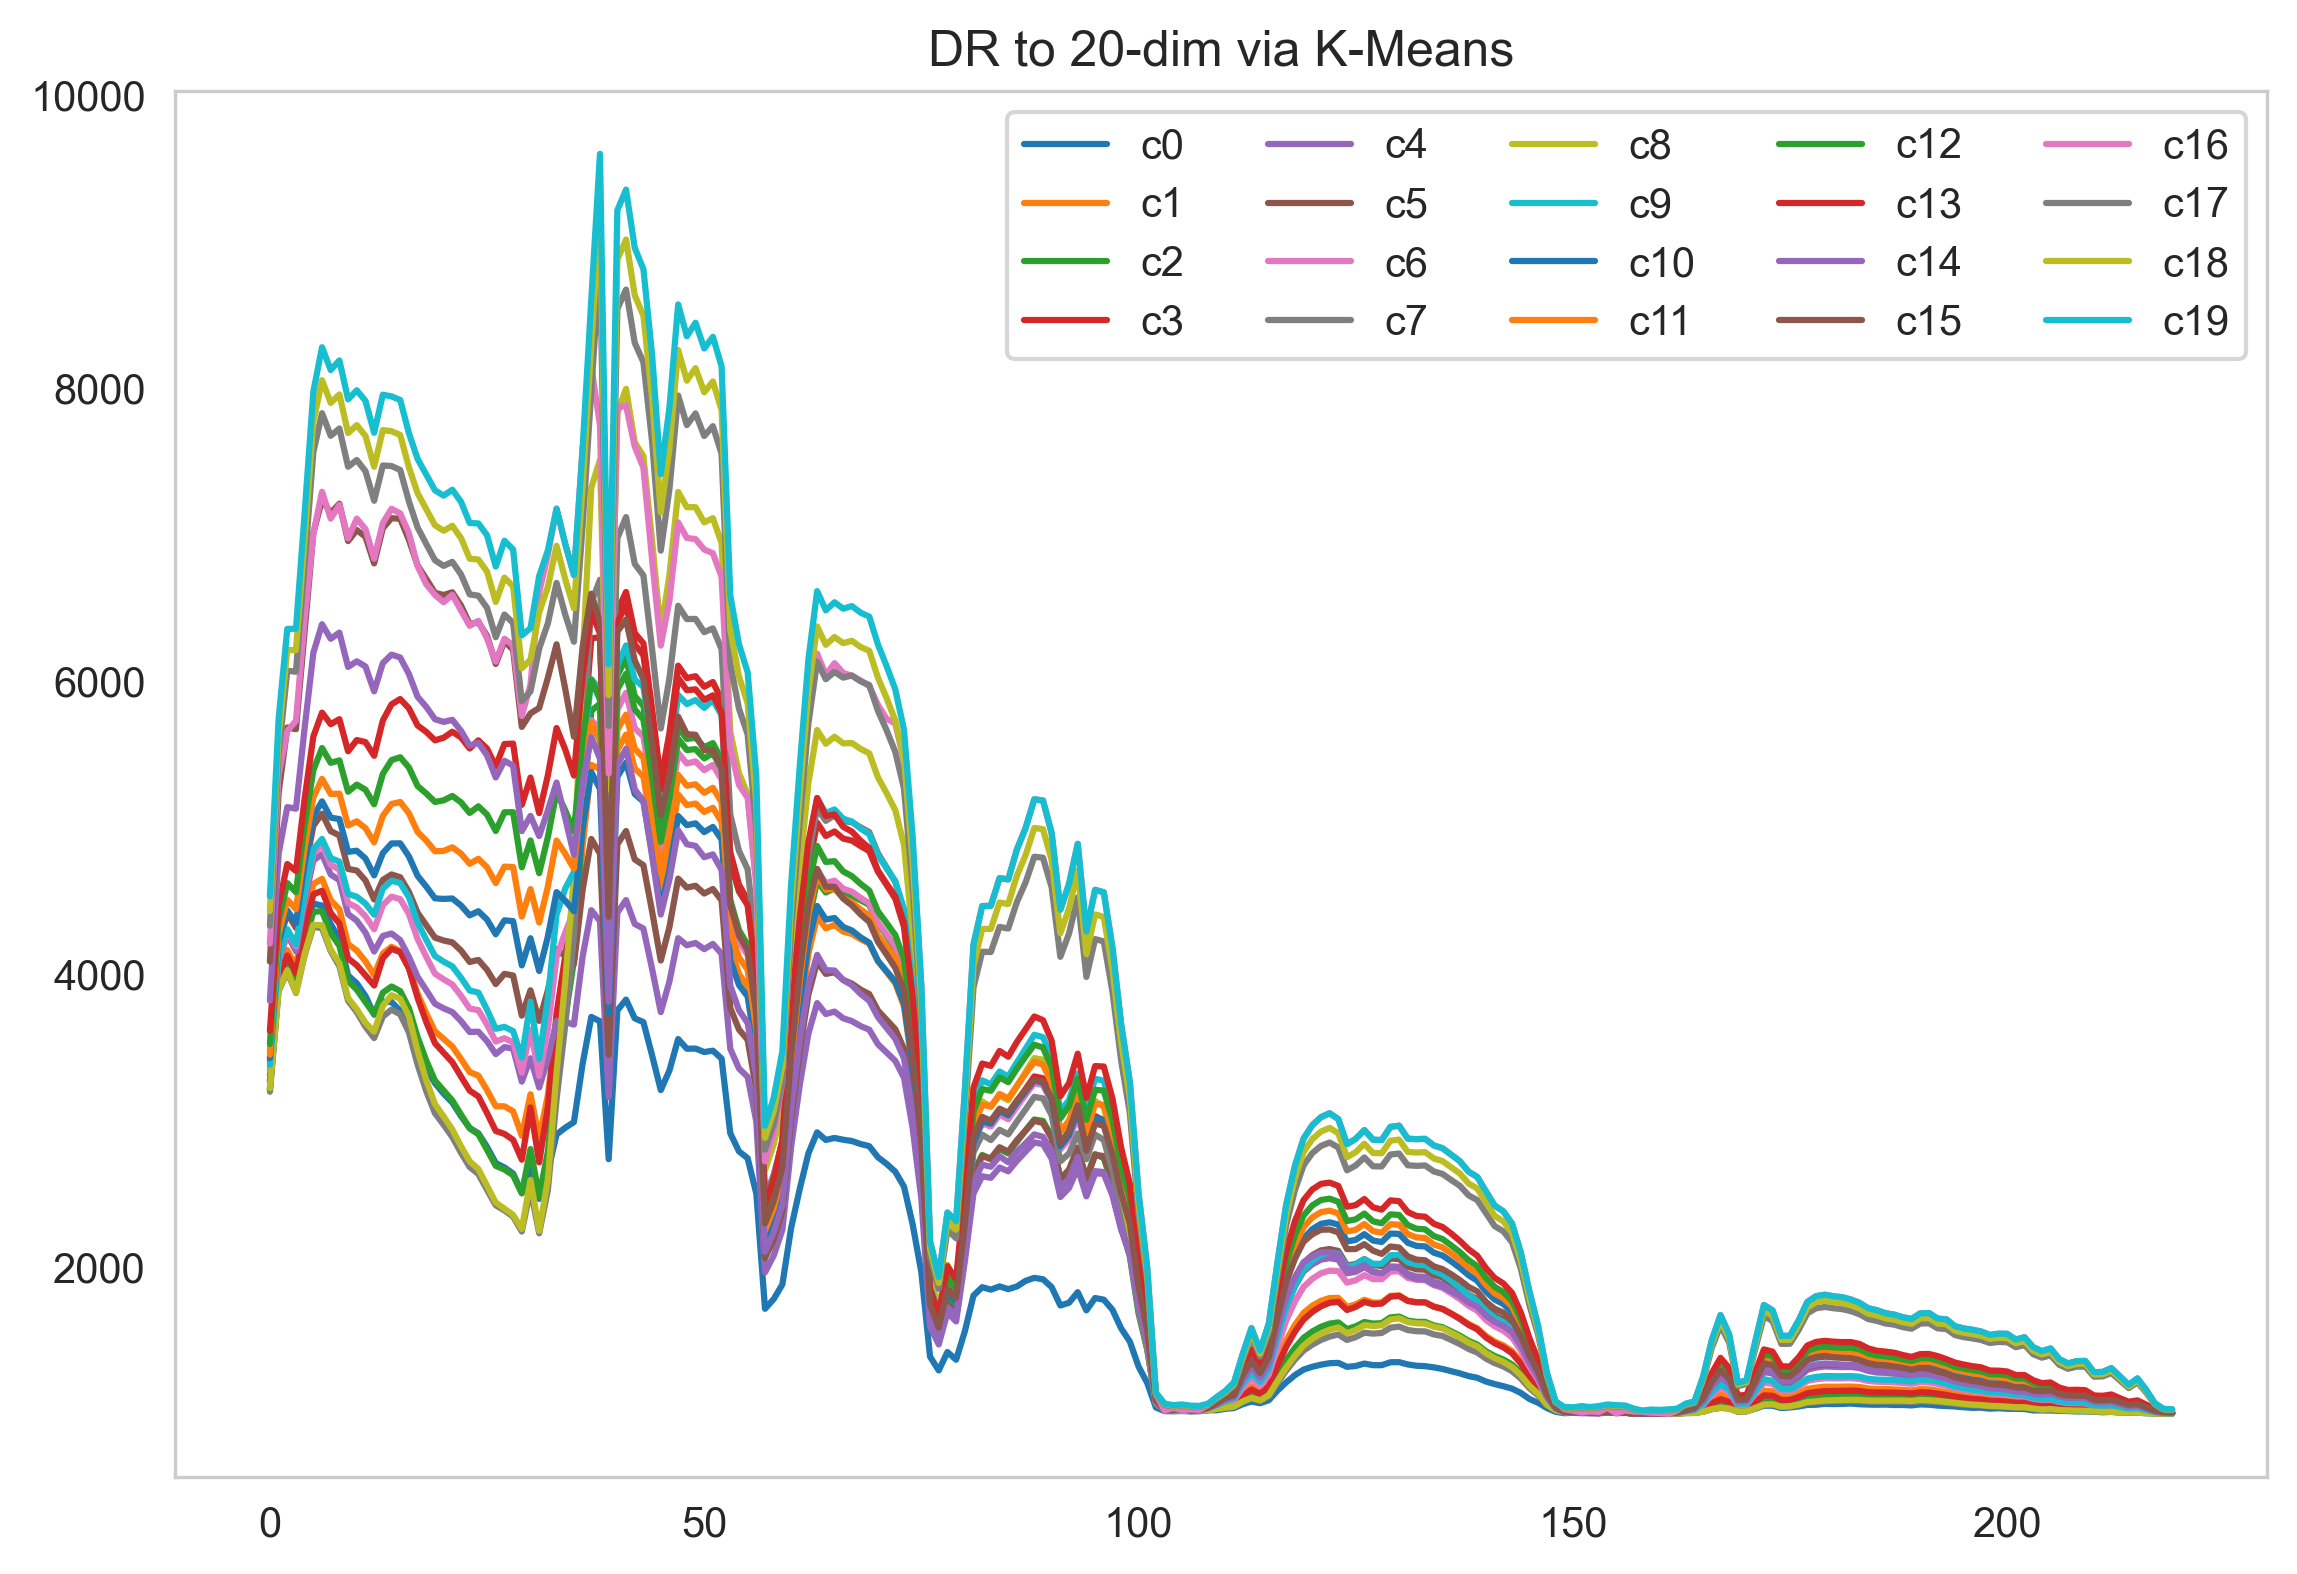

In [33]:
plt.figure(figsize=(9,6), dpi=300)
for i in range(c.shape[0]):
    plt.plot(c[i], label=f'c{i}')
plt.grid()
plt.title('DR to 20-dim via K-Means')
plt.legend(ncol=5, loc='best')

D:\Program Files\miniconda\envs\torch\lib\site-packages\spectral\graphics\spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Interpolation       :  <default>

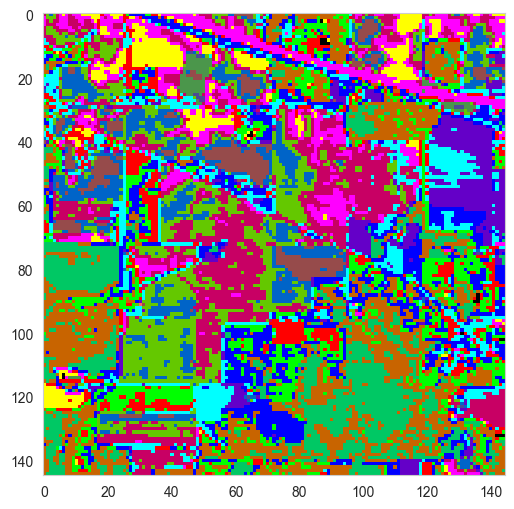

In [34]:
hsi.imshow(figsize=(9,6), classes=m)